In [2]:
import sqlite3
import pandas as pd

# Connect to the SQLite database (since it's in the same folder, you can just use the filename)
db_path = 'metadata-110mil.sqlite'
conn = sqlite3.connect(db_path)

# Check available tables in the database (optional)
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("Available tables:", tables)

# Specify the table you want to load
table_name = 'metadata'  # Replace with your actual table name

# Load the table into a DataFrame
df = pd.read_sql_query(f"SELECT * FROM {table_name};", conn)

# Close the database connection
conn.close()

# Display the first few rows of the DataFrame
df.head()


Available tables:        name
0  metadata


,Path,Title,Author,Category,Genre,Language,Status,Published,Updated,Packaged,Rating,Chapters,Words,Publisher,Story URL,Author URL,Summary,word_count,chapter_count,story_id
0,Fanfiction/Halo_ Mass Effect/Completed/Halo_ M...,The Distant Strains of Triumph,SpartanDelta2,"Halo, Mass Effect","Drama, Sci-Fi",English,Completed,2013-07-15,2013-07-15,2013-10-28 09:08:08,M,1,"1,180",www.fanfiction.net,http://www.fanfiction.net/s/9493934/1/,http://www.fanfiction.net/u/2727455/SpartanDelta2,"A project for my class, a challenge from my te...",1180,1,9493934
1,Fanfiction/Halo_ Mass Effect/Completed/Halo_ M...,Mass Effect: Beyond,Cunningham-Hughes,"Halo, Mass Effect","Adventure, Sci-Fi",English,Completed,2012-10-01,2012-10-01,2013-07-21 09:44:53,T,1,"9,971",www.fanfiction.net,http://www.fanfiction.net/s/8573953/1/,http://www.fanfiction.net/u/4262625/Cunningham...,A hardcore Mass Effect fan's retelling of the ...,9971,1,8573953
2,Fanfiction/Halo_ Mass Effect/Completed/Halo_ M...,Chaos Infinitium,Sysero of Cain,"Halo, Mass Effect","Adventure, Sci-Fi",English,Completed,2011-03-11,2011-11-17,2014-11-23 22:48:57,T,5,"19,447",www.fanfiction.net,https://www.fanfiction.net/s/6816070/1/,https://www.fanfiction.net/u/2362265/Sysero-of...,First Contact never seems to go well. But thin...,19447,5,6816070
3,Fanfiction/Halo_ Mass Effect/Completed/Halo_ M...,Tools of Defiance,Magisking,"Halo, Mass Effect","Angst, Tragedy",English,Completed,2013-12-22,2013-12-22,2014-02-07 23:48:12,T,1,997,www.fanfiction.net,https://www.fanfiction.net/s/9946669/1/,https://www.fanfiction.net/u/5244687/Magisking,A One-shot that takes place in the Defiance un...,997,1,9946669
4,Fanfiction/Halo_ Mass Effect/Completed/Halo_ M...,Mass Effect New Origins V2,erttheking,"Halo, Mass Effect","Romance, Sci-Fi",English,Completed,2010-10-05,2012-06-09,2014-05-25 15:31:13,T,109,"442,687",www.fanfiction.net,https://www.fanfiction.net/s/6376514/1/,https://www.fanfiction.net/u/1835782/erttheking,"On the dawn of the 27th century, the UNSC disc...",442687,109,6376514


In [4]:
df.shape

(6704321, 20)

C:\Users\kaur\AppData\Local\Temp\ipykernel_2384\3504510599.py:23: UserWarning: Glyph 36914 (\N{CJK UNIFIED IDEOGRAPH-9032}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\kaur\AppData\Local\Temp\ipykernel_2384\3504510599.py:23: UserWarning: Glyph 25731 (\N{CJK UNIFIED IDEOGRAPH-6483}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\kaur\AppData\Local\Temp\ipykernel_2384\3504510599.py:23: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\kaur\AppData\Local\Temp\ipykernel_2384\3504510599.py:23: UserWarning: Glyph 24040 (\N{CJK UNIFIED IDEOGRAPH-5DE8}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\kaur\AppData\Local\Temp\ipykernel_2384\3504510599.py:23: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\kaur\AppData\Local\Temp\ipykernel_2384\3504510599.py:23: UserWarning: Glyph 40658 (\N{CJK UNIFIED IDEOGR

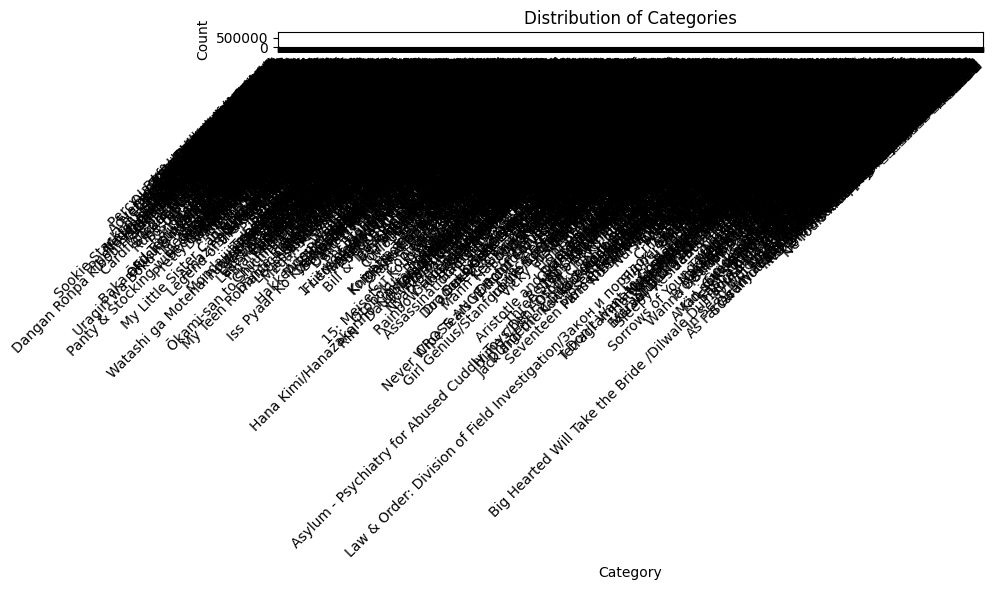

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data (assuming it's already in a DataFrame `df`)
# df = pd.read_csv('your_file.csv')  # Uncomment this if you're loading from a CSV file

# Split categories by commas and stack them to get a single column of all categories
all_categories = df['Category'].str.split(',').explode()

# Strip any extra whitespace from each category (important if there are spaces after commas)
all_categories = all_categories.str.strip()

# Count occurrences of each unique category
category_counts = all_categories.value_counts()

# Plot as a bar chart
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [9]:
print(len(all_categories.unique()))

9975
